# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

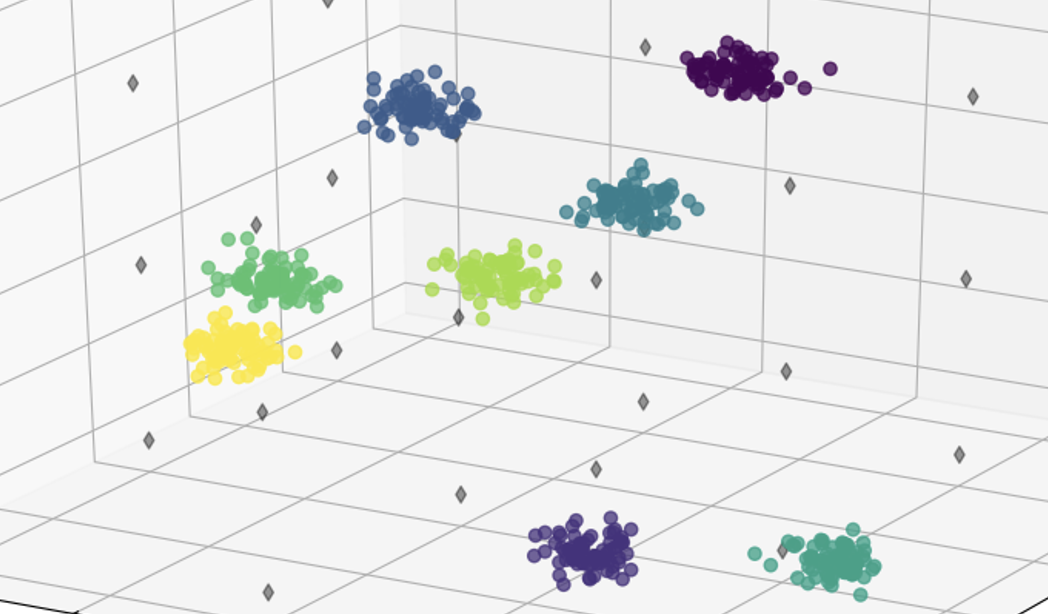

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

In [12]:
n_samples = 1000
centers = [(2, 2), (6, 6)]  
cluster_std = 1.0  


X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

data = pd.DataFrame(X, columns=['x', 'y'])
data['class'] = y

In [13]:
csv_path = 'linear_separable_data.csv'
data.to_csv(csv_path, index=False)

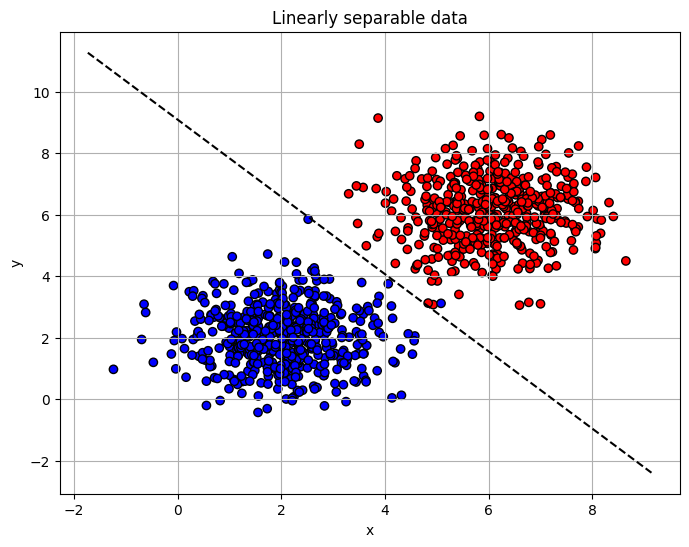

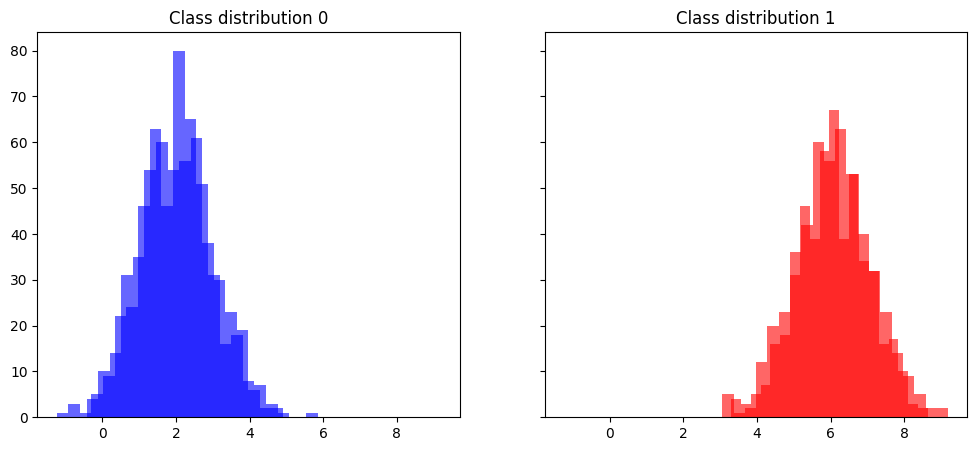

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Linearly separable data')

model = LogisticRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_


x_vals = np.array(plt.gca().get_xlim())
y_vals = -(x_vals * coef[0] + intercept) / coef[1]
plt.plot(x_vals, y_vals, color='black', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)


axes[0].hist(data[data['class'] == 0]['x'], color='blue', alpha=0.6, bins=20)
axes[0].hist(data[data['class'] == 0]['y'], color='blue', alpha=0.6, bins=20)
axes[0].set_title('Class distribution 0')


axes[1].hist(data[data['class'] == 1]['x'], color='red', alpha=0.6, bins=20)
axes[1].hist(data[data['class'] == 1]['y'], color='red', alpha=0.6, bins=20)
axes[1].set_title('Class distribution 1')

plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

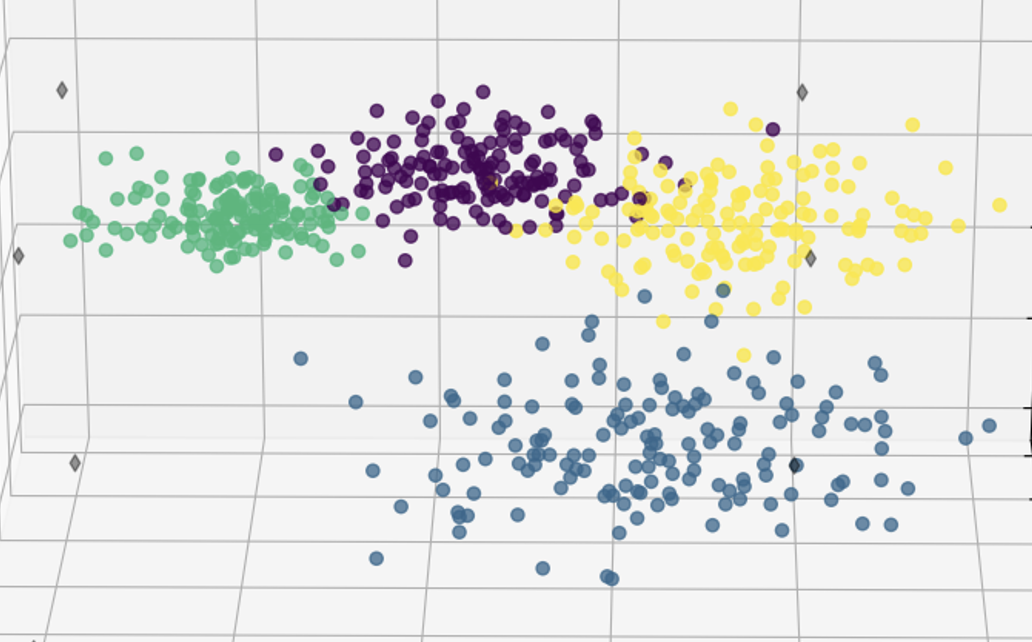

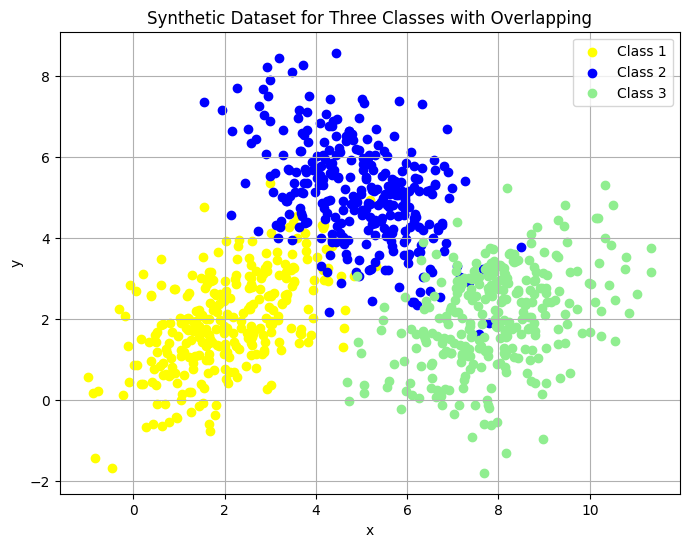

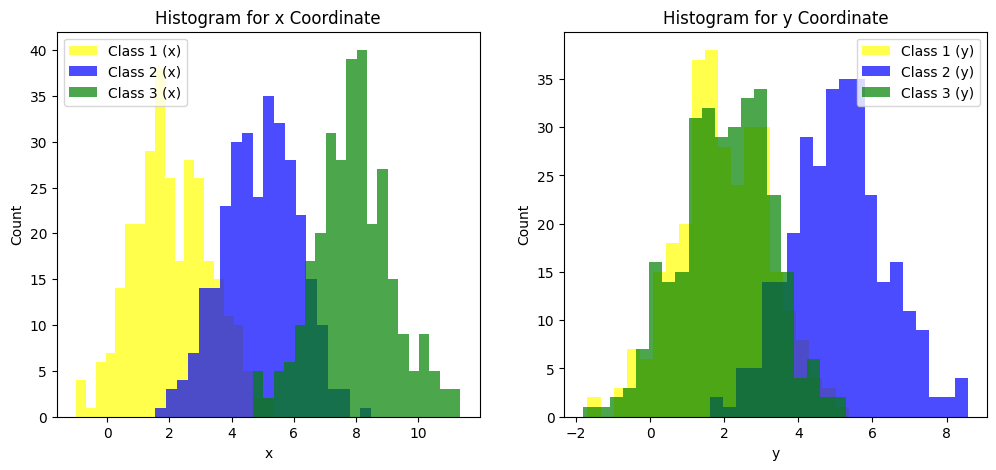

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


n_points = 300


mean1 = [2, 2]
cov1 = [[1.5, 0.7], [0.7, 1.5]]  


mean2 = [5, 5]
cov2 = [[1.5, -0.7], [-0.7, 1.5]]  


mean3 = [8, 2]
cov3 = [[1.5, 0.5], [0.5, 1.5]]  


class1 = np.random.multivariate_normal(mean1, cov1, n_points)
labels1 = np.zeros(n_points)  


class2 = np.random.multivariate_normal(mean2, cov2, n_points)
labels2 = np.ones(n_points)  


class3 = np.random.multivariate_normal(mean3, cov3, n_points)
labels3 = np.full(n_points, 2) 


data = np.vstack((class1, class2, class3))
labels = np.hstack((labels1, labels2, labels3))


df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels
df.to_csv('overlapping_data.csv', index=False)


plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='yellow', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='blue', label='Class 2')
plt.scatter(class3[:, 0], class3[:, 1], color='lightgreen', label='Class 3')

plt.title('Synthetic Dataset for Three Classes with Overlapping')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(class1[:, 0], bins=20, color='yellow', alpha=0.7, label='Class 1 (x)')
plt.hist(class2[:, 0], bins=20, color='blue', alpha=0.7, label='Class 2 (x)')
plt.hist(class3[:, 0], bins=20, color='green', alpha=0.7, label='Class 3 (x)')
plt.title('Histogram for x Coordinate')
plt.xlabel('x')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(class1[:, 1], bins=20, color='yellow', alpha=0.7, label='Class 1 (y)')
plt.hist(class2[:, 1], bins=20, color='blue', alpha=0.7, label='Class 2 (y)')
plt.hist(class3[:, 1], bins=20, color='green', alpha=0.7, label='Class 3 (y)')
plt.title('Histogram for y Coordinate')
plt.xlabel('y')
plt.ylabel('Count')
plt.legend()

plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

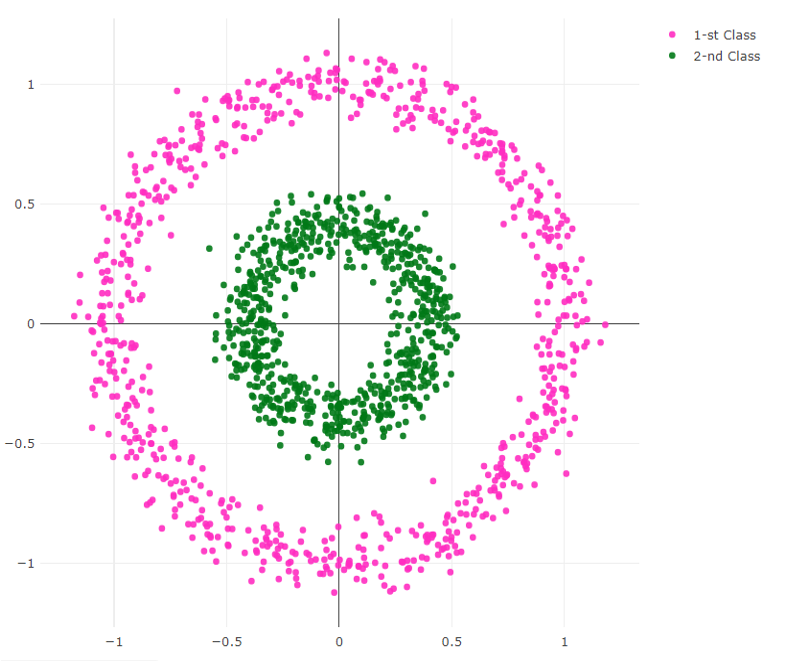

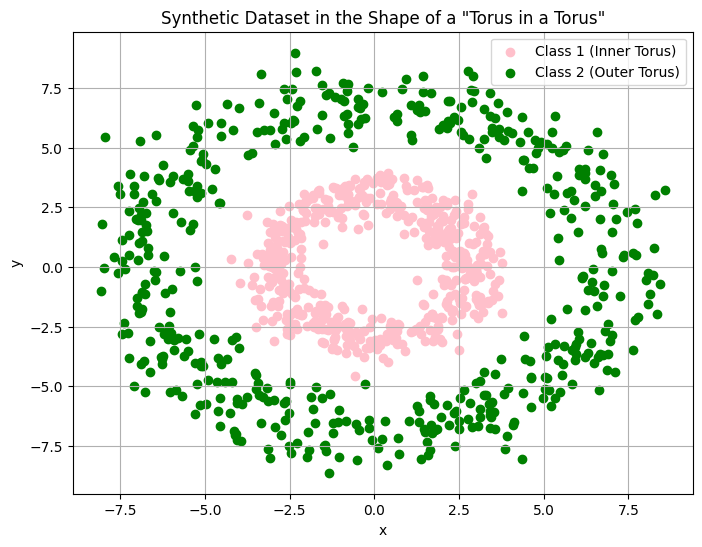

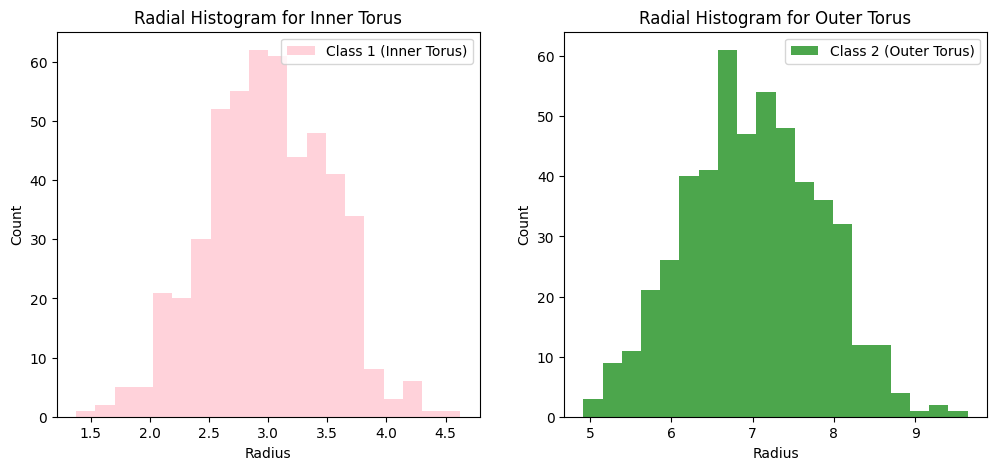

In [19]:
def generate_torus(num_points, radius, width, noise_level=0.1):
    angles = np.random.uniform(0, 2 * np.pi, num_points)  
    radii = np.random.normal(radius, width, num_points)  
    x = radii * np.cos(angles) + np.random.normal(0, noise_level, num_points)  
    y = radii * np.sin(angles) + np.random.normal(0, noise_level, num_points)  
    return np.vstack((x, y)).T


n_points = 500


inner_radius = 3
inner_width = 0.5
class1 = generate_torus(n_points, inner_radius, inner_width)
labels1 = np.zeros(n_points)  


outer_radius = 7
outer_width = 0.8
class2 = generate_torus(n_points, outer_radius, outer_width)
labels2 = np.ones(n_points)  


data = np.vstack((class1, class2))
labels = np.hstack((labels1, labels2))


df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels
df.to_csv('torus_in_torus_data.csv', index=False)


plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='pink', label='Class 1 (Inner Torus)')
plt.scatter(class2[:, 0], class2[:, 1], color='green', label='Class 2 (Outer Torus)')
plt.title('Synthetic Dataset in the Shape of a "Torus in a Torus"')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

radii_class1 = np.sqrt(class1[:, 0]**2 + class1[:, 1]**2)
radii_class2 = np.sqrt(class2[:, 0]**2 + class2[:, 1]**2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(radii_class1, bins=20, color='pink', alpha=0.7, label='Class 1 (Inner Torus)')
plt.title('Radial Histogram for Inner Torus')
plt.xlabel('Radius')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(radii_class2, bins=20, color='green', alpha=0.7, label='Class 2 (Outer Torus)')
plt.title('Radial Histogram for Outer Torus')
plt.xlabel('Radius')
plt.ylabel('Count')
plt.legend()

plt.show()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

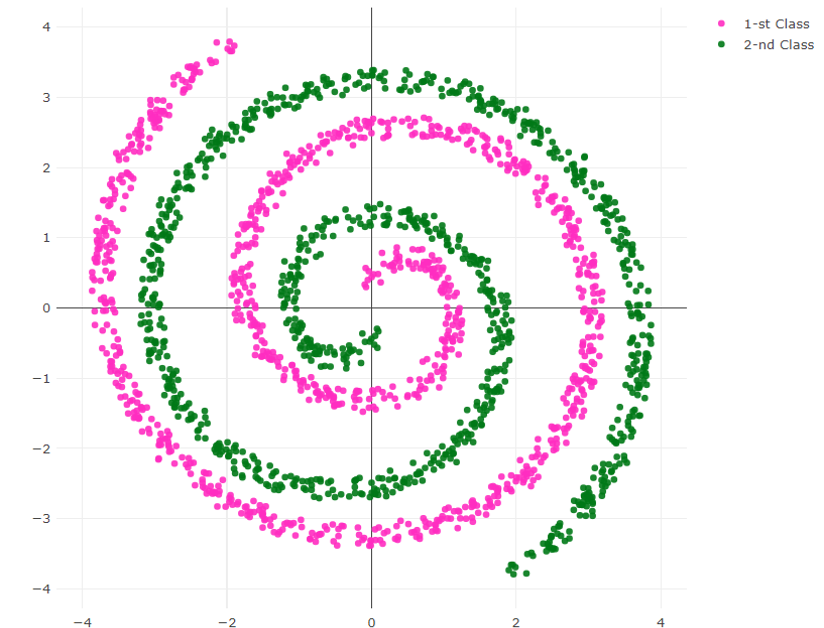

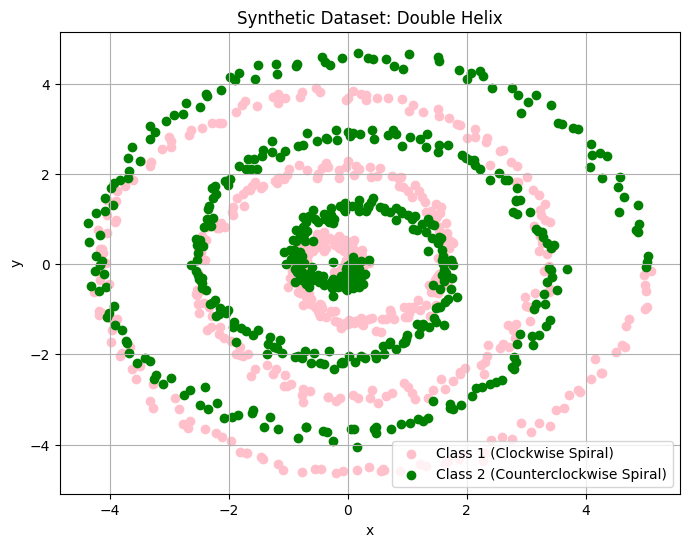

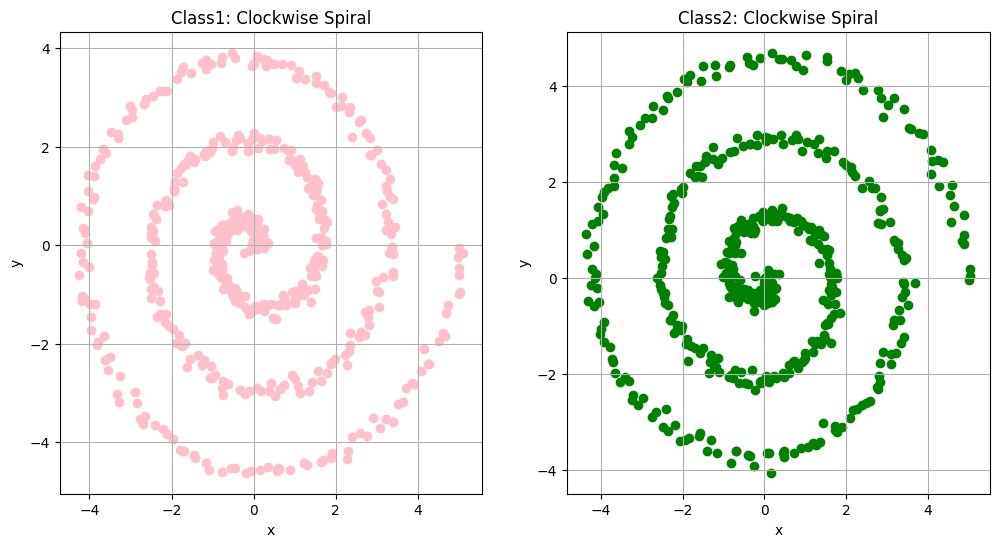

In [20]:
def generate_spiral(num_points, turns, noise_level=0.1, clockwise=True):
    theta = np.linspace(0, turns * 2 * np.pi, num_points)
    r = np.linspace(0, 5, num_points)
    
    if clockwise:
        x = r * np.cos(theta) + np.random.normal(0, noise_level, num_points)
        y = r * np.sin(theta) + np.random.normal(0, noise_level, num_points)
    else:
        x = r * np.cos(-theta) + np.random.normal(0, noise_level, num_points)
        y = r * np.sin(-theta) + np.random.normal(0, noise_level, num_points)
    
    return np.vstack((x, y)).T


n_points = 500
turns = 3  


class1 = generate_spiral(n_points, turns, noise_level=0.1, clockwise=True)
labels1 = np.zeros(n_points)  


class2 = generate_spiral(n_points, turns, noise_level=0.1, clockwise=False)
labels2 = np.ones(n_points)  


data = np.vstack((class1, class2))
labels = np.hstack((labels1, labels2))


df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels
df.to_csv('double_spiral_data.csv', index=False)


plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='pink', label='Class 1 (Clockwise Spiral)')
plt.scatter(class2[:, 0], class2[:, 1], color='green', label='Class 2 (Counterclockwise Spiral)')
plt.title('Synthetic Dataset: Double Helix')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(class1[:, 0], class1[:, 1], color='pink')
plt.title('Class1: Clockwise Spiral')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(class2[:, 0], class2[:, 1], color='green')
plt.title('Class2: Clockwise Spiral')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

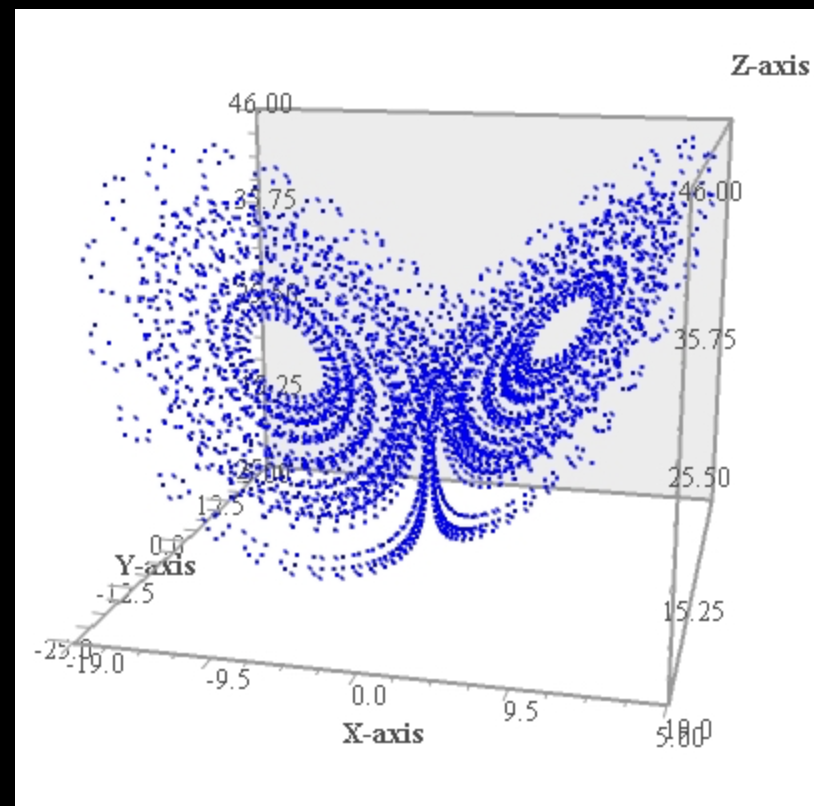

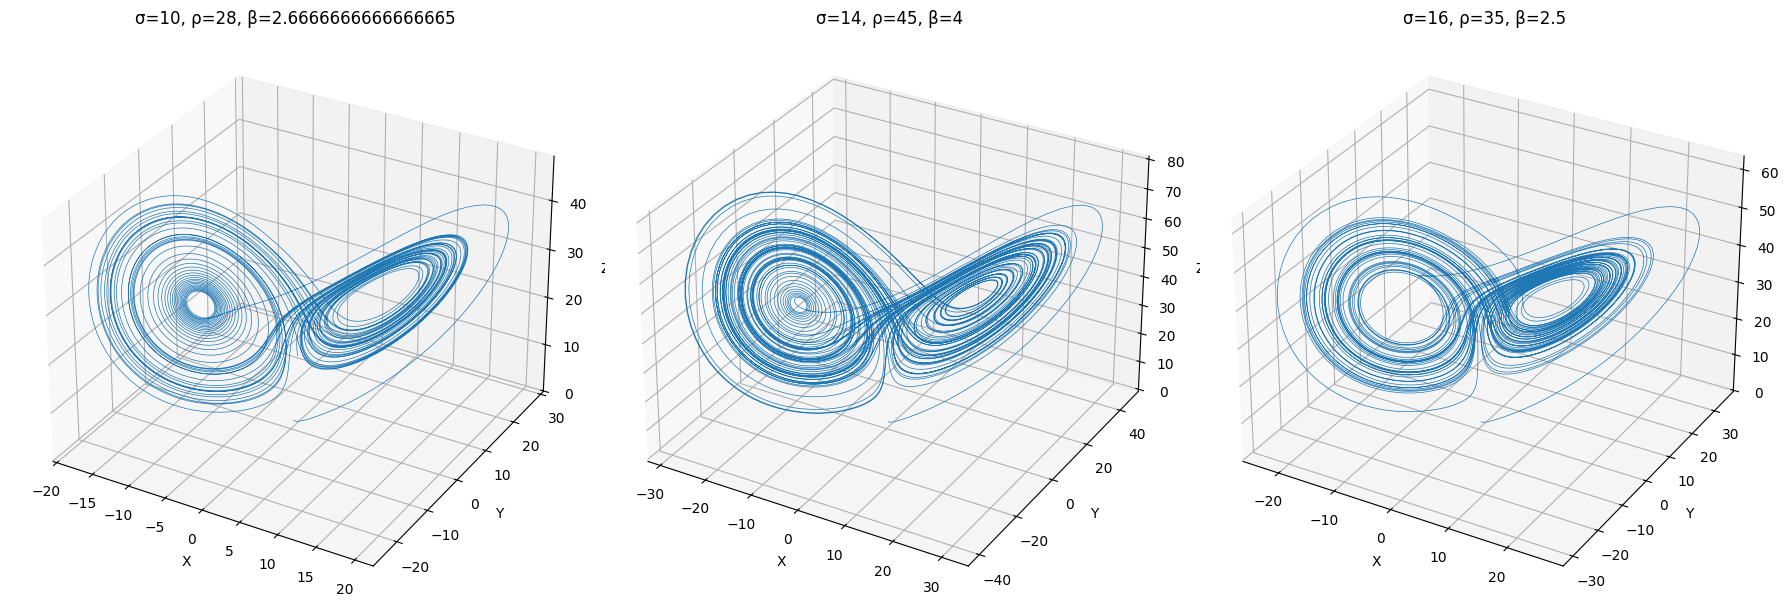

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]


params_sets = [
    {'sigma': 10, 'rho': 28, 'beta': 8/3},
    {'sigma': 14, 'rho': 45, 'beta': 4},
    {'sigma': 16, 'rho': 35, 'beta': 2.5}
]


initial_state = [0.0, 1.0, 1.05]
t_span = (0, 50)
t_eval = np.linspace(0, 50, 10000)


fig = plt.figure(figsize=(18, 6))

for i, params in enumerate(params_sets):
    solution = solve_ivp(lorenz, t_span, initial_state, args=(params['sigma'], params['rho'], params['beta']), t_eval=t_eval)
    x, y, z = solution.y
    
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.plot(x, y, z, lw=0.5)
    ax.set_title(f"σ={params['sigma']}, ρ={params['rho']}, β={params['beta']}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()